# **CSE 546: Final Project**

## Libraries Importation and Data Reading
- Import the necessary libraries.
- Load and inspect the movie reviews dataset.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # found online ~ due to y values not being integers but strings
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
ds = pd.read_csv("Data.csv")

y = ds["class"]
images = ds["image_name"]
ds = ds.drop("class", axis=1)
ds = ds.drop("image_name", axis=1)

## KNN Classifier

### Base Algorithm

k running now: 1
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 2
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 3
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 4
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 5
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 6
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 7
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 8
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 9
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 10
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
k running now: 11
Fold runnin

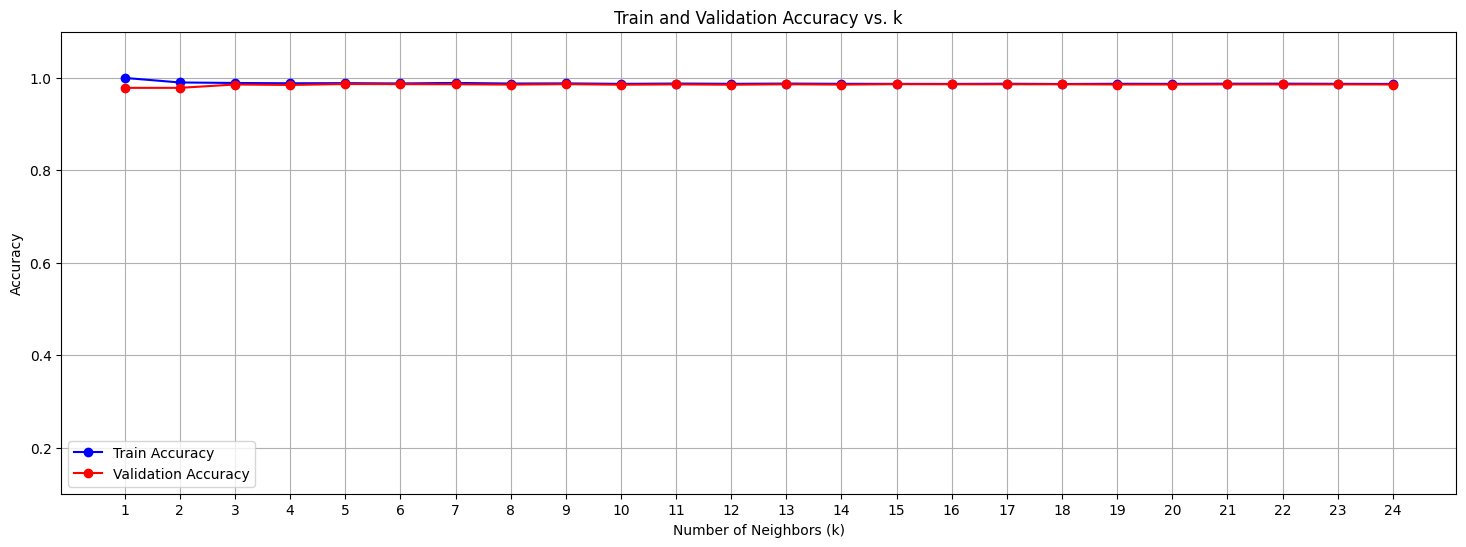

Best Validation Accuracy: 0.9868 for K = 5.0000e+00


In [3]:
# Classifier #1: KNN --------------------------------------------------------------------------
# KNN 4-fold cross validation on K parameter: 5 wins - 0.9868 with K = 5.0000e+00
X=ds.to_numpy()
y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_range = range(1, 25)  # varying k values
cv_scores = []
average_scores = []
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=42)

for k in k_range:
    fold_train_scores = []
    fold_val_scores = []
    print("k running now:", k)
    count = 0
    for train_index, test_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(knn.score(X_train_fold, y_train_fold))
        fold_val_scores.append(knn.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(k_range, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(k_range, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. k')
plt.xticks(k_range)
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_alpha = k_range[best_index]
best_val_acc = val_scores[best_index]

print(f"Best Validation Accuracy: {best_val_acc:.4f} for K = {best_alpha:.4e}")



### Testing Different Metrics


In [4]:
# testing different metrics------------Minkowski wins(k value = 5, train was 0.9887 and validation was 0.9868)
X=ds.to_numpy()
X=ds.to_numpy()
y=y.to_numpy()


le = LabelEncoder()
y = le.fit_transform(y)
X = pd.get_dummies(ds).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits=4, shuffle=True, random_state=42)
best_k = 5
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
train_accuracies = {metric: [] for metric in distance_metrics}
val_accuracies = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    train_scores = []
    val_scores = []
    print(metric)
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
        knn.fit(X_train_fold, y_train_fold)

        train_scores.append(knn.score(X_train_fold, y_train_fold))
        val_scores.append(knn.score(X_val_fold, y_val_fold))

    train_accuracies[metric] = np.mean(train_scores)
    val_accuracies[metric] = np.mean(val_scores)

plt.figure(figsize=(10, 6))

for metric in distance_metrics:
    plt.plot([best_k], [train_accuracies[metric]], marker='o', label=f'{metric.capitalize()} (Training Accuracy)', linestyle='--')

for metric in distance_metrics:
    plt.plot([best_k], [val_accuracies[metric]], marker='s', label=f'{metric.capitalize()} (Validation Accuracy)')

plt.title(f"KNN Accuracy Comparison with Different Distance Metrics (k={best_k})")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
for metric in distance_metrics:
    print(f"Best k = {best_k}, Distance Metric = {metric.capitalize()}:")
    print(f"Training Accuracy: {train_accuracies[metric]:.4f}")
    print(f"Validation Accuracy: {val_accuracies[metric]:.4f}")
    print('---')



AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Data Normalization

In [8]:
#actual values - no preprocessing ------------- (goes with code at line 160)
# X=ds.to_numpy()
# y=y.to_numpy()

#KNN Data normalization #1: MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#KNN Data normalization #2: Mean-Sigma
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative

#KNN Data normalization #3: Median-MAD
def median_mad_normalize(X): #SOURCE: google generative ai when searched in google "median mad normalization in python"
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6
    X_normalized = (X - medians) / mad
    return X_normalized
X = median_mad_normalize(X)

#KNN Data normalization #4: robustScaler
robust_scaler = RobustScaler()
X_selected = robust_scaler.fit_transform(X)



### Feature Selection

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
Highest Accuracy: 0.9880 at k=23


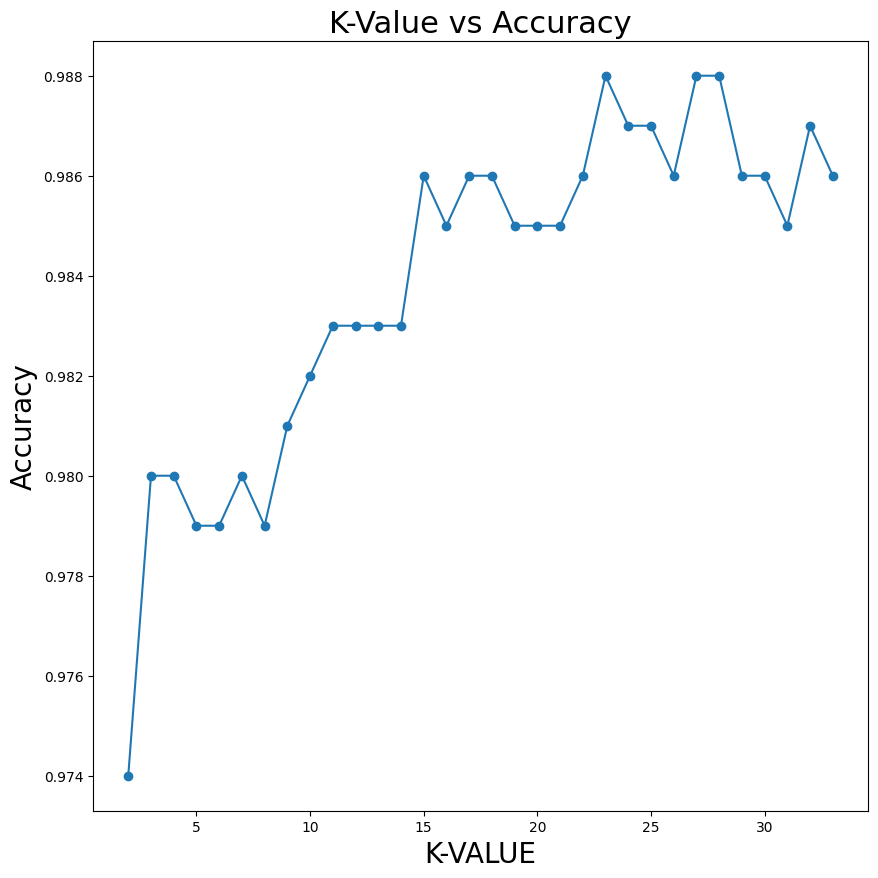

Accuracy with RF-selected features: 0.9810
Selected feature indices: [  0   1   3   4   8   9  10  12  14  15  17  19  20  23  24  29  31  33
  36  37  38  42  45  51  52  55  57  58  59  61  62  65  67  72  74  75
  76  77  78  79  81  82  83  84  85  87  88  90  91  92  94  95  96  97
  99 100 101 103 104 106 107 108 109 110 111 114 116 121 122 123 125 129
 130 134 135 137 140 143 146 147 148 151 152 154 159 160 169 170 171 172
 174 175 176 178 179 185 189 191 192 193 198 199 200 202 203 205 207 208
 213 216 218 224 226 228 229 230 235 236 240 241 242 245 246 247 249 250
 253 255]


In [9]:
# KNN Feature selection #1 - uncomment the second train_test_split and comment out first train_test_split

k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(2,34,1)
knn_dict={}
for i in k_list:
    print(i)
    knn=KNeighborsClassifier(n_neighbors=int(i), metric='minkowski')
    model_knn=knn.fit(X_train,y_train.ravel())
    y_knn_pred=model_knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_knn_pred)
    knn_dict[i] = accuracy
best_k = max(knn_dict, key=knn_dict.get)
best_accuracy = knn_dict[best_k]
print(f"Highest Accuracy: {best_accuracy:.4f} at k={best_k}")
ax.plot(knn_dict.keys(),knn_dict.values(), marker='o', linestyle='-')
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('Accuracy',fontsize=20)
ax.set_title('K-Value vs Accuracy', fontsize=22)
plt.show()

# KNN Feature selection #2 - another method found online that uses RFC ------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

## MNB Classifier

### Base Algorithm

A running now: 0.0001
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 0.001
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 0.01
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 0.1
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 1.0
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 10.0
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 100.0
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 1000.0
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
A running now: 10000.0
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4


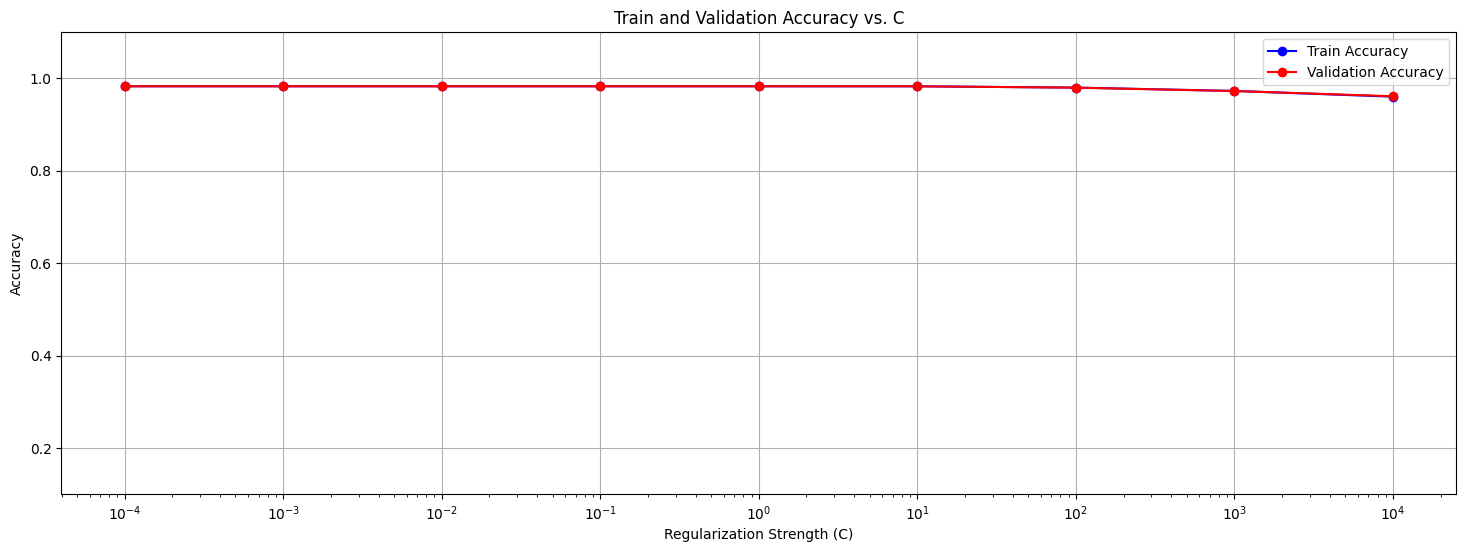

Best Validation Accuracy: 0.9828 for Alpha = 1.0000e-04


In [11]:
# Classifier 2: MNB --------------------------------------------------------------------------
# 4 fold on MNB: alpha that won = 10^-4, 0.9828
# X=ds.to_numpy()
# y=y.to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #savles feautres to be [0,1] to avoid negative bc mnb doesn't work with negative values in data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_range = np.logspace(-4, 4, 9)  # This creates a range from 1e-4 to 1e4
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for A in alpha_range:
    fold_train_scores = []
    fold_val_scores = []
    print("A running now:", A)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        mnb = MultinomialNB(alpha=A)
        mnb.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(mnb.score(X_train_fold, y_train_fold))
        fold_val_scores.append(mnb.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(alpha_range, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(alpha_range, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_alpha = alpha_range[best_index]
best_val_acc = val_scores[best_index]

print(f"Best Validation Accuracy: {best_val_acc:.4f} for Alpha = {best_alpha:.4e}")

### Data Normalization

In [13]:
# X=ds.to_numpy()
# y=y.to_numpy()
# MNB Data normalization #1: MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# MNB Data normalization #2: Mean-Sigma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative

# MNB Data normalization #3: Median-MAD
def median_mad_normalize_nonnegative(data):
    medians = np.median(data, axis=0)
    mad = np.median(np.abs(data - medians), axis=0)
    mad[mad == 0] = 1  # Prevent division by zero
    normalized_data = (data - medians) / mad

    # Shift to make all values non-negative
    min_val = np.min(normalized_data)
    if min_val < 0:
        normalized_data += abs(min_val) + 1e-6  # Shift to ensure non-negativity
    return normalized_data
X = median_mad_normalize_nonnegative(X)

# MNB Data normalization #4: robustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
X = X - X.min(axis=0) #shift so no negatives

### Feature Selection

Highest Test Accuracy: 0.9590 at Alpha = 1.0000e+02


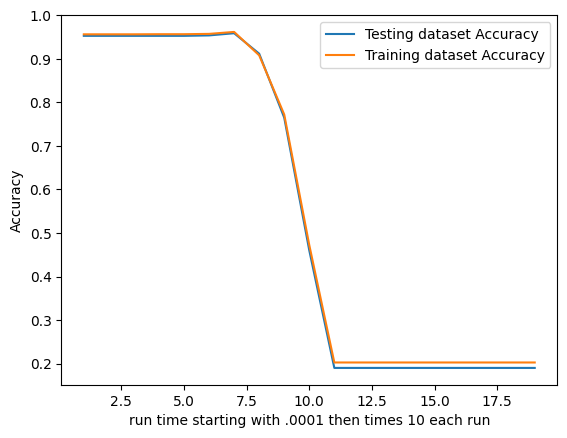

Accuracy with RF-selected features: 0.9660
Selected feature indices: [ 0  1  2  5  6 11 12 13 15 16 18 22 23 24 25 26 27 31 35 37 41 44 46 47
 49]


In [15]:
# MNB Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neighbors = np.arange(1, 20)
flag = .00001
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
alpha_values = []
for i in range(0, 19):
    flag *= 10
    mnb = MultinomialNB(alpha=flag, fit_prior=True, force_alpha=True)
    mnb.fit(X_train, y_train)
    train_accuracy[i] = mnb.score(X_train, y_train)
    test_accuracy[i] = mnb.score(X_test, y_test)
    alpha_values.append(flag)
best_index = np.argmax(test_accuracy)
best_alpha = alpha_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Highest Test Accuracy: {best_test_acc:.4f} at Alpha = {best_alpha:.4e}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('run time starting with .0001 then times 10 each run')
plt.ylabel('Accuracy')
plt.show()

# MNB Feature selection #2 - another method found online that uses RFC
# X=ds.to_numpy()
# y=y.to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
mnb = MultinomialNB(alpha=100, fit_prior=True, force_alpha=True) #select optimal value
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

## RF Classifier

### Base Algorithm

depth running now: None
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 5
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 10
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 20
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 30
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 50
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
depth running now: 100
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4


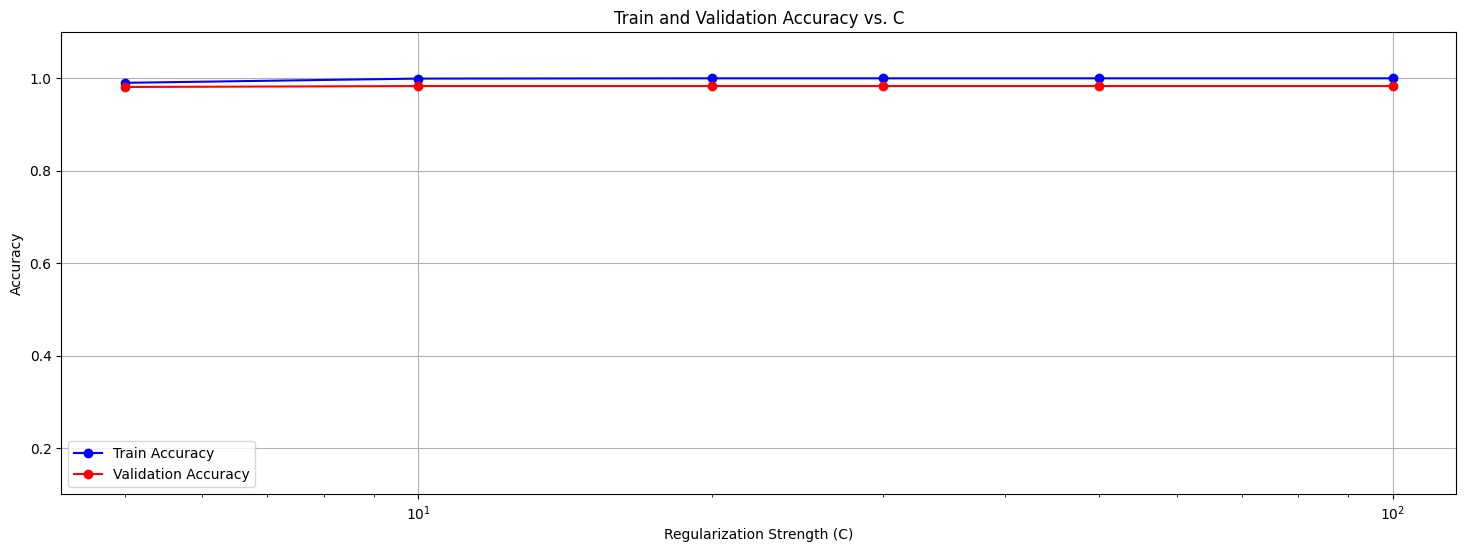

Best Validation Accuracy: 0.9832 for depth = None


In [16]:
#Classifier #3: RF --------------------------------------------------------------------------
#4fold on max_depth on RF with n_estimators=1000 => winner: max_depth=None
# X=ds.to_numpy()
# y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for N in max_depth_values:
    fold_train_scores = []
    fold_val_scores = []
    print("depth running now:", N)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        forest = RandomForestClassifier(n_estimators=1000,max_depth=N, random_state=42)
        forest.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(forest.score(X_train_fold, y_train_fold))
        fold_val_scores.append(forest.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(max_depth_values, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(max_depth_values, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_n = max_depth_values[best_index]
best_val_acc = val_scores[best_index]
print(f"Best Validation Accuracy: {best_val_acc:.4f} for depth = {best_n}")

### Data Normalization

In [17]:
# RF: no preprocessing ----------------------
# X=ds.to_numpy()
# y=y.to_numpy()

# RF Data normalization #1: MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# KNN Data normalization #2: Mean-Sigma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative

# KNN Data normalization #3: Median-MAD
def median_mad_normalize(X): #SOURCE: google generative ai when searched in google "median mad normalization in python"
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6
    X_normalized = (X - medians) / mad
    return X_normalized
X = median_mad_normalize(X)

# RF Data normalization #4: robustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

### Feature Selection, Feature Importance and Trees

None
5
10
20
30
50
100
Highest Test Accuracy: 0.9830 at depth = 10


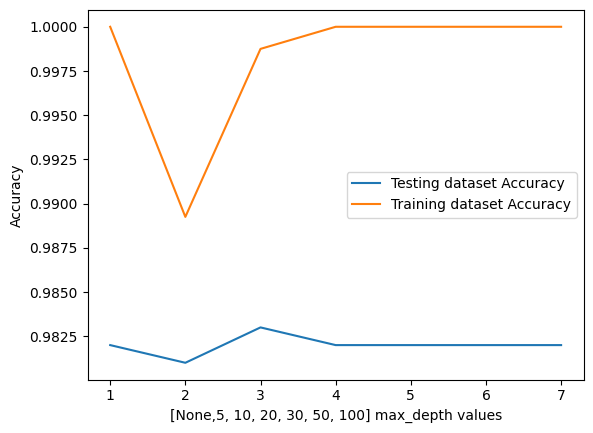

Accuracy with RF-selected features: 0.9830
Selected feature indices: [ 0  1  2  5  6 11 12 13 15 16 18 22 23 24 25 26 27 31 35 37 41 44 46 47
 49]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (50,) and arg 3 with shape (256,).

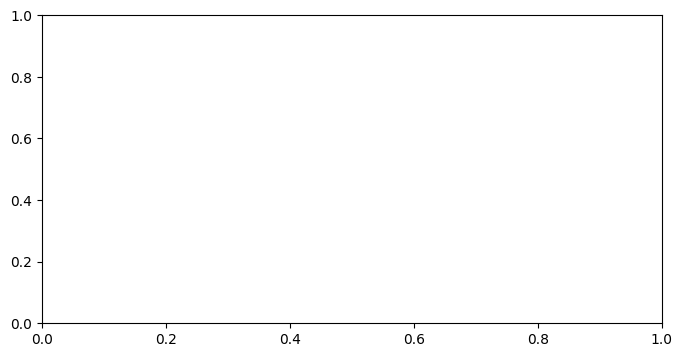

In [21]:
# RF Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth_values = [None,5, 10, 20, 30, 50, 100]
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
depth_values = []
for i in range(0, 7):
    print(max_depth_values[i])
    forest = RandomForestClassifier(n_estimators=1000,max_depth=max_depth_values[i], random_state=42)
    forest.fit(X_train, y_train)
    train_accuracy[i] = forest.score(X_train, y_train)
    test_accuracy[i] = forest.score(X_test, y_test)
    depth_values.append(max_depth_values[i])
best_index = np.argmax(test_accuracy)
best_alpha = depth_values[best_index]
best_test_acc = test_accuracy[best_index]
print(f"Highest Test Accuracy: {best_test_acc:.4f} at depth = {best_alpha}")
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('[None,5, 10, 20, 30, 50, 100] max_depth values')
plt.ylabel('Accuracy')
plt.show()

# RF Feature selection #2
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
forest = RandomForestClassifier(n_estimators=1000,max_depth=50, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

# RF Feature importance graph #1
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lengthOfFeaturesInOrder = np.arange(1, 257)
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train.ravel())
importances = forest.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(lengthOfFeaturesInOrder, importances, color='skyblue')
plt.xlabel('Random Forest Importance')
plt.title('Feature Importance - RF Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

#RF Feature importance graph #2
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RF = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
RF.fit(X_train, y_train.ravel())
RF_feature_weights = RF.feature_importances_
feature_weights=RF_feature_weights.flatten()
# Create a DataFrame to store the features and their corresponding weights
features_df = pd.DataFrame({
    'Feature': ds.columns,
    'Weight': feature_weights
})
# Sort by the absolute value of weights to see the most important features
features_df['Absolute Weight'] = np.abs(features_df['Weight'])
features_df = features_df.sort_values(by='Absolute Weight', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Weight", data=features_df.head(20), palette="coolwarm")
plt.title("Top 10 Features by Weight in RF Model")
plt.xlabel("Feature")
plt.ylabel("Weight")
# Rotate the x labels by 45 degrees
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting the RF trees(change n_estimators to 1000 for actual results)
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
RF = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
RF.fit(X_train, y_train.ravel())
from sklearn import tree
plt.figure(figsize=(12, 5))
tree.plot_tree(RF.estimators_[0], filled=True)
plt.title("First Tree in Random Forest")
plt.show()

# Plot the last tree
plt.figure(figsize=(12, 5))
tree.plot_tree(RF.estimators_[-1], filled=True)
plt.title("Last Tree in Random Forest")
plt.show()

## GBC Classifier

### Base Algorithm

In [23]:
#Classifier #4: GBC ----------------------------------------------------------------------------
#4-fold validation on n_estimators with max_depth=3 ~ very long running times
# X=ds.to_numpy()
# y=y.to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
n_range = [1, 5, 10, 20, 50, 100, 200, 500] #1, 5, 10, 20, 50, 100, 200, 1000
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for N in n_range:
    fold_train_scores = []
    fold_val_scores = []
    print("N running now:", N)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        gbc = GradientBoostingClassifier(n_estimators=N, max_depth=3, random_state=42)
        gbc.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(gbc.score(X_train_fold, y_train_fold))
        fold_val_scores.append(gbc.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(n_range, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(n_range, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_n = n_range[best_index]
best_val_acc = val_scores[best_index]
print(f"Best Validation Accuracy: {best_val_acc:.4f} for N = {best_n:.4e}")

#4-fold validation on learning_rate with max_depth=3 & n_Estimators=500 ~ very long running times --
X=ds.to_numpy()
y=y.to_numpy()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)

for lr in learning_rates:
    fold_train_scores = []
    fold_val_scores = []
    print("learning_rate running now:", lr)
    count = 0
    for train_index, val_index in kf.split(X_train, y_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=lr, max_depth=3, random_state=42)
        gbc.fit(X_train_fold, y_train_fold)

        fold_train_scores.append(gbc.score(X_train_fold, y_train_fold))
        fold_val_scores.append(gbc.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))
best_index = np.argmax(val_scores)
best_n = learning_rates[best_index]
best_val_acc = val_scores[best_index]
print(f"Best Validation Accuracy: {best_val_acc:.4f} for learning_rate = {best_n:.4e}")
plt.figure(figsize=(18, 6))
plt.plot(learning_rates, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(learning_rates, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. learning_rate')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()

N running now: 1
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 5
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 10
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 20
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 50
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 100
Fold running now: 1
Fold running now: 2
Fold running now: 3
Fold running now: 4
N running now: 200
Fold running now: 1


KeyboardInterrupt: 

### Data Normalization


In [ ]:
#GBC: no preprocessing
# X=ds.to_numpy()
# y=y.to_numpy()

#GBC Data normalization #1: MinMax
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#GBC Data normalization #2: Mean-Sigma
scaler = StandardScaler()
X = scaler.fit_transform(X)
if (X < 0).any():
    X -= X.min(axis=0)  #make all features non-negative

#GBC Data normalization #3: Median-MAD
def median_mad_normalize(X): #SOURCE: google generative ai when searched in google "median mad normalization in python"
    medians = np.median(X, axis=0)
    mad = np.median(np.abs(X - medians), axis=0)
    mad[mad == 0] = 1e-6
    X_normalized = (X - medians) / mad
    return X_normalized
X = median_mad_normalize(X)

#GBC Data normalization #4: robustScaler
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

### Feature Selection, Feature Importance and Trees

In [ ]:
# GBC Feature selection #1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X = selector.fit_transform(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_range = [1, 5, 10, 20, 50, 100, 200, 500]
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i in range(0, 8):
    print(n_range[i])
    gbc = GradientBoostingClassifier(n_estimators=(n_range[i]), max_depth=3, learning_rate=0.1, random_state=42)
    gbc.fit(X_train, y_train.ravel())
    train_accuracy[i] = gbc.score(X_train, y_train)
    test_accuracy[i] = gbc.score(X_test, y_test)
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('[1, 5, 10, 20, 50, 100, 200, 1000] n_estimator values')
plt.ylabel('Accuracy')
plt.show()

# GBC feature selection #2
# X=ds.to_numpy()
# y=y.to_numpy()
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median") #selects above the median
X_selected = selector.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RF-selected features: {accuracy:.4f}")
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

# GBC Feature importance #1
# X=ds.to_numpy()
# y=y.to_numpy()
lengthOfFeaturesInOrder = np.arange(1, 257)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
importances = gbc.feature_importances_
plt.figure(figsize=(8, 4))
plt.barh(lengthOfFeaturesInOrder, importances, color='skyblue')
plt.xlabel('GradientBoostingClassifier Importance')
plt.title('Feature Importance - GBC Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# GBC Feature importance #2
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import seaborn as sns
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
RF_feature_weights = gbc.feature_importances_
feature_weights=RF_feature_weights.flatten()
# Create a DataFrame to store the features and their corresponding weights
features_df = pd.DataFrame({
    'Feature': ds.columns,
    'Weight': feature_weights
})
# Sort by the absolute value of weights to see the most important features
features_df['Absolute Weight'] = np.abs(features_df['Weight'])
features_df = features_df.sort_values(by='Absolute Weight', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="Weight", data=features_df.head(20), palette="coolwarm")
plt.title("Top 10 Features by Weight in RF Model")
plt.xlabel("Feature")
plt.ylabel("Weight")
# Rotate the x labels by 45 degrees
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# plotting trees from GBC
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=5, max_depth=3, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

plt.figure(figsize=(12, 5))
tree.plot_tree(gbc.estimators_[0,0], filled=True)
plt.title("First Tree in GBR")
plt.show()

# Plot the last tree
plt.figure(figsize=(12, 5))
tree.plot_tree(gbc.estimators_[-1,0], filled=True)
plt.title("Last Tree in GBR")
plt.show()

## SVM Classifier

### Base Algorithm

In [ ]:
# checks which normalization was the best: stand wins - copy and pasted from hw4 solution
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaling_methods = ['No Scaling', 'MinMax', 'Standard']
scalers = {
    'No Scaling': None,
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler()
}

scaling_method_param = []
train_acc = []
val_acc = []

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=4)

# Iterate over each scaling method
for scale_method in scaling_methods:
    scaler = scalers[scale_method]

    # Apply scaling if scaler is defined, else keep original X_train
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        X_train_scaled = X_train  # assuming X_train is a DataFrame

    print(f"Scaling: {scale_method}")
    train_accuracies = []
    val_accuracies = []

    # Stratified K-Fold
    for train_index, val_index in skf.split(X_train_scaled, y_train):
        X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]

        # SVM model with default parameters
        model = SVC(kernel='rbf')  # Default SVM parameters
        model.fit(X_tr, y_tr)

        # Store accuracies
        train_accuracies.append(model.score(X_tr, y_tr))
        val_accuracies.append(model.score(X_val, y_val))

    # Calculate average accuracies
    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)
    print(f"Avg Val Acc for Scaling={scale_method}: {avg_val_accuracy}")

    # Store results
    scaling_method_param.append(scale_method)
    train_acc.append(avg_train_accuracy)
    val_acc.append(avg_val_accuracy)

# Create DataFrame for results
results_df = pd.DataFrame({
    'Scaling Method': scaling_method_param,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc
})
print(results_df)

### Varying Parameters

In [ ]:
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
C_values = [0.1, 10, 100]
gamma_values = [0.01, 0.1, 1]

C_param = []
gamma_param = []
train_acc = []
val_acc = []

skf = StratifiedKFold(n_splits=4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for C in C_values:
    for gamma in gamma_values:
        print(f"C = {C}, Gamma = {gamma}")
        train_accuracies = []
        val_accuracies = []

        for train_index, val_index in skf.split(X_train_scaled, y_train):
            X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]

            model = SVC(kernel='rbf', C=C, gamma=gamma)

            model.fit(X_tr, y_tr)

            train_accuracy = model.score(X_tr, y_tr)
            train_accuracies.append(train_accuracy)

            val_accuracy = model.score(X_val, y_val)
            val_accuracies.append(val_accuracy)

        avg_train_accuracy = np.mean(train_accuracies)
        avg_val_accuracy = np.mean(val_accuracies)
        print(f"Avg Val Acc for C={C}, Gamma={gamma}: {avg_val_accuracy}")

        # Store results
        C_param.append(C)
        gamma_param.append(gamma)
        train_acc.append(avg_train_accuracy)
        val_acc.append(avg_val_accuracy)

results_df = pd.DataFrame({
    'C': C_param,
    'Gamma': gamma_param,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc
})
# Plot training and validation accuracies in the same plot
plt.figure(figsize=(10, 6))

# Loop through gamma values and plot both training and validation accuracy for each
for gamma in gamma_values:
    subset = results_df[results_df['Gamma'] == gamma]
    plt.plot(subset['C'], subset['Train Accuracy'], label=f'Training Accuracy (Gamma={gamma})', marker='o')
    plt.plot(subset['C'], subset['Validation Accuracy'], label=f'Validation Accuracy (Gamma={gamma})', marker='o', linestyle='--')

max_val_index = np.argmax(val_acc)

# Retrieve the corresponding C, Gamma, and Validation Accuracy
best_C = C_param[max_val_index]
best_gamma = gamma_param[max_val_index]
best_val_acc = val_acc[max_val_index]

# Print the results
print(f"Highest Validation Accuracy: {best_val_acc:.4f}")
print(f"Best Parameters: C = {best_C}, Gamma = {best_gamma}")

# Set x-axis to logarithmic scale for C
plt.xscale('log')

# Labels, title, and legend
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different C and Gamma Values')
plt.legend()
plt.tight_layout()
plt.show()

### Degree Parameter

In [ ]:
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.1, 10, 100]
gamma_values = [0.01, 0.1, 1]
degree_values = [2, 3, 4]


C_param = []
gamma_param = []
degree_param = []
train_acc = []
val_acc = []

skf = StratifiedKFold(n_splits=4)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for C in C_values:
    for gamma in gamma_values:
        for degree in degree_values:
            print(f"C = {C}, Gamma = {gamma}, Degree = {degree}")
            train_accuracies = []
            val_accuracies = []

            for train_index, val_index in skf.split(X_train_scaled, y_train):
                X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
                y_tr, y_val = y_train[train_index], y_train[val_index]

                #polynomial kernel SVM model
                model = SVC(kernel='poly', C=C, gamma=gamma, degree=degree)


                model.fit(X_tr, y_tr)

                # Accuracy on training set
                train_accuracy = model.score(X_tr, y_tr)
                train_accuracies.append(train_accuracy)

                # Accuracy on validation set
                val_accuracy = model.score(X_val, y_val)
                val_accuracies.append(val_accuracy)

            avg_train_accuracy = np.mean(train_accuracies)
            avg_val_accuracy = np.mean(val_accuracies)
            print(f"Avg Val Acc for C={C}, Gamma={gamma}, Degree={degree}: {avg_val_accuracy}")

            C_param.append(C)
            gamma_param.append(gamma)
            degree_param.append(degree)
            train_acc.append(avg_train_accuracy)
            val_acc.append(avg_val_accuracy)

results_df = pd.DataFrame({
    'C': C_param,
    'Gamma': gamma_param,
    'Degree': degree_param,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc
})

print(results_df)

### Probability Section Graph

In [ ]:
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf', probability=True, C=100)
svm.fit(X_train, y_train.ravel())

y_probMLP = svm.predict_proba(X_test)
num_classes = y_probMLP.shape[1]
plt.figure(figsize=(15, 5))
for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.scatter(y_test, y_probMLP[:, i], alpha=0.5)
    plt.title(f'Class {i} Probability')
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Probability')
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

## MLP Classifier

### Base Algorithm with Data Normalization

In [ ]:
# Classifier #6: MLP --------------------------------------------------------------------------------
# testing different normalizations --------------------------------
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaling_methods = ['No Scaling', 'MinMax', 'Standard']
scalers = {
    'No Scaling': None,
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler()
}

scaling_method_param = []
train_acc = []
val_acc = []

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=4)

# Iterate over each scaling method
for scale_method in scaling_methods:
    scaler = scalers[scale_method]

    # Apply scaling if scaler is defined, else keep original X_train
    if scaler is not None:
        X_train_scaled = scaler.fit_transform(X_train)
    else:
        X_train_scaled = X_train  # assuming X_train is a DataFrame

    # Initialize lists to store accuracies for each fold
    train_accuracies = []
    val_accuracies = []

    print(f"Scaling Method: {scale_method}")

### Hidden Layer Sizes

In [ ]:
# hidden_layer_szie parameter check ----------------------------------------------------------
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
layer_configs = [(1,), (3,),(5,)]
node_counts = [64, 128, 256]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Set up 4-fold Stratified Cross-Validation
skf = StratifiedKFold(n_splits=4)

# Initialize lists to store results
layer_param = []
node_param = []
train_acc = []
val_acc = []

# Loop through each combination of layer count and node count
for layers in layer_configs:
    for nodes in node_counts:
        print(f"Layers = {layers[0]}, Nodes = {nodes}")
        train_accuracies = []
        val_accuracies = []

        # Create hidden layer configuration
        hidden_layer_sizes = tuple([nodes] * layers[0])

        # Perform 4-fold Stratified cross-validation
        for train_index, val_index in skf.split(X_train_scaled, y_train):
            X_tr, X_val = X_train_scaled[train_index], X_train_scaled[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]

            # Define the MLP model
            model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=42)

            # Train the model
            model.fit(X_tr, y_tr)

            # Calculate training accuracy
            train_accuracy = model.score(X_tr, y_tr)
            train_accuracies.append(train_accuracy)

            # Calculate validation accuracy
            val_accuracy = model.score(X_val, y_val)
            val_accuracies.append(val_accuracy)

        # Average training and validation accuracies across the 4 cases
        avg_train_accuracy = np.mean(train_accuracies)
        avg_val_accuracy = np.mean(val_accuracies)
        print(avg_val_accuracy)
        # Store results for plotting
        layer_param.append(layers[0])
        node_param.append(nodes)
        train_acc.append(avg_train_accuracy)
        val_acc.append(avg_val_accuracy)

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Layers': layer_param,
    'Nodes': node_param,
    'Train Accuracy': train_acc,
    'Validation Accuracy': val_acc
})

# Plot training and validation accuracies
plt.figure(figsize=(12, 6))

# Plot for training accuracy
plt.subplot(1, 2, 1)
for nodes in node_counts:
    subset = results_df[results_df['Nodes'] == nodes]
    plt.plot(subset['Layers'], subset['Train Accuracy'], label=f'Nodes={nodes}', marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Plot for validation accuracy
plt.subplot(1, 2, 2)
for nodes in node_counts:
    subset = results_df[results_df['Nodes'] == nodes]
    plt.plot(subset['Layers'], subset['Validation Accuracy'], label=f'Nodes={nodes}', marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.suptitle('Training and Validation Accuracy for Different MLP Configurations')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Varying Parameters

In [ ]:
# MLP: other parameters ----------------------------------------------------------------------------
mainRange = [.1, 1, 10, 100]
train_scores = []
val_scores = []
kf = KFold(n_splits=4, shuffle=True, random_state=50)
from sklearn.model_selection import train_test_split
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solverStrings = ['lbfgs', 'lbfgs', 'adam', 'adam']
hiddenLaySize = [[10,10],[10],[10,10],[10]]

for A in mainRange:
    fold_train_scores = []
    fold_val_scores = []
    print("A running now:", A)
    count = 0
    for train_index, val_index in kf.split(X_train):
        count += 1
        print("Fold running now:", count)
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        mlp = MLPClassifier(solver=solverStrings[(count-1)], random_state=0, alpha=A, hidden_layer_sizes=hiddenLaySize[(count-1)])
        mlp.fit(X_train_fold, y_train_fold)

        print("Validation Score: " + str(mlp.score(X_val_fold, y_val_fold)) + ". solver=" + str(solverStrings[(count-1)]) + ". alpha=" + str(A) + ". hidden_layer_sizes=" + str(hiddenLaySize[(count-1)]))
        fold_train_scores.append(mlp.score(X_train_fold, y_train_fold))
        fold_val_scores.append(mlp.score(X_val_fold, y_val_fold))

    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

plt.figure(figsize=(18, 6))
plt.plot(mainRange, train_scores, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(mainRange, val_scores, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy vs. C')
plt.ylim(0.1, 1.1)  # set y-axis limits
plt.legend()
plt.grid(True)
plt.show()
best_index = np.argmax(val_scores)
best_alpha = mainRange[best_index]
best_val_acc = val_scores[best_index]
print("best value:", best_val_acc)

### MLP Predicting Probability

In [ ]:
# MLP predicting pobability ----------------------
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha=100, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train.ravel())

y_probMLP = mlp.predict_proba(X_test)
num_classes = y_probMLP.shape[1]
plt.figure(figsize=(15, 5))
for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.scatter(y_test, y_probMLP[:, i], alpha=0.5)
    plt.title(f'Class {i} Probability')
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Probability')
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

## SVM and MLP

In [ ]:
# SVC and MLP together:  --------------------------------------
# might need to change parameters on some of these to accomodate the best optimal values
# might need to change to optimize noramlization to it or not use normalization at all
# X=ds.to_numpy()
# y=y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.transform(X_test)

mlp = MLPClassifier(solver='lbfgs', random_state=0, alpha=100, hidden_layer_sizes=[10])
mlp.fit(Xtrain, y_train.ravel())

svm = SVC(kernel='rbf', probability=True, C=100)
svm.fit(Xtrain, y_train.ravel())

proba1 = mlp.predict_proba(Xtest)[:, 1]
proba2 = svm.predict_proba(Xtest)[:, 1]

label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

plt.scatter(proba1, proba2, c=y_test_numeric, cmap='viridis')
plt.xlabel("Model 1 Probability")
plt.ylabel("Model 2 Probability")
plt.title("Scatter Plot of Predicted Probabilities")
plt.colorbar()
plt.show()

svm_probs = svm.predict_proba(Xtest)
mlp_probs = mlp.predict_proba(Xtest)

# Scatter plots for each class
class_labels = {0: 'person', 1: 'sign', 2: 'bike', 3: 'bus', 4: 'car'}
n_classes = len(class_labels)
fig, axes = plt.subplots(1, n_classes, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.scatter(svm_probs[:, i], mlp_probs[:, i], alpha=0.5)
    ax.set_title(f'Class {class_labels[i]}')
    ax.set_xlabel('SVM Probability')
    ax.set_ylabel('MLP Probability')

plt.suptitle('SVM vs. MLP Probability Scatter Plots per Class')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()